In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random

# = pd.read_csv('../results/Batch_4386648_batch_results_3-29-21.csv')
results = pd.read_csv('../results/Batch_4425246_combined_batch_results_5-5-21.csv')

In [328]:
results.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.premID_1',
       'Input.mask-type_1', 'Input.hypoID_1', 'Input.premise_1',
       'Input.hypothesis_1', 'Input.orig-prob_1', 'Input.model-label_1',
       'Input.flip-class_1', 'Input.premID_2', 'Input.mask-type_2',
       'Input.hypoID_2', 'Input.premise_2', 'Input.hypothesis_2',
       'Input.orig-prob_2', 'Input.model-label_2', 'Input.flip-class_2',
       'Input.premID_3', 'Input.mask-type_3', 'Input.hypoID_3',
       'Input.premise_3', '

In [329]:
# # to fill in the missing batches prevented by worker HIT limitation script.
# batch = pd.read_csv('../mturk/4-15-21/Pilot_Test_Batch_150-4-29-21.csv')
# ones = []
# twos = []
# for item in Counter(results['Input.premID_1']).items():
#     if item[1] == 1:
#         ones.append(item[0])
#     if item[1] == 2:
#         twos.append(item[0])
#
# batch_ones = batch.loc[batch['premID_1'].isin(ones)]
# assert batch_ones.shape[0] == len(ones)
# batch_ones.to_csv('batch_ones_5-6-21.csv')

# batch_twos = batch.loc[batch['premID_1'].isin(twos)]
# assert batch_twos.shape[0] == len(twos)
# batch_twos.to_csv('batch_twos_5-6-21.csv')

In [330]:
from collections import Counter
Counter(results['WorkerId']).most_common(100)

[('A1W7I6FN183I8F', 119),
 ('A2615YW1YERQBO', 106),
 ('A270HX8LH9LJ8W', 86),
 ('A1PAY3X73PQ16S', 73),
 ('A2E0LU8V4EUX5C', 58),
 ('A1M52J1BIO1O2V', 1)]

In [331]:
IO_cols = results.columns[['Input' in col or 'Answer' in col for col in results.columns]]
IO_cols = IO_cols.append(pd.Index(['WorkerId','WorkTimeInSeconds']))

df = results[IO_cols]
df

,Input.premID_1,Input.mask-type_1,Input.hypoID_1,Input.premise_1,Input.hypothesis_1,Input.orig-prob_1,Input.model-label_1,Input.flip-class_1,Input.premID_2,Input.mask-type_2,...,Answer.comments,Answer.numanswered,Answer.response_1,Answer.response_2,Answer.response_3,Answer.response_4,Answer.response_5,Answer.useragent,WorkerId,WorkTimeInSeconds
0,12000,content-words,62087,You may want to visit some of the other inlan...,Sant Joan is the name of a large inland hamlet...,1.00,neutral,Certain-Flip,12000,content-words,...,{},5,neutral,contradiction,contradiction,entailment,contradiction,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:8...,A2E0LU8V4EUX5C,147
1,12000,content-words,62087,You may want to visit some of the other inlan...,Sant Joan is the name of a large inland hamlet...,1.00,neutral,Certain-Flip,12000,content-words,...,{},5,neutral,contradiction,contradiction,entailment,contradiction,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A270HX8LH9LJ8W,813
2,10692,content-words,55028,"And when he did five to seven copypastes, whic...","When he did five to seven copy edits, he felt ...",1.00,neutral,Certain-Same,10692,content-words,...,{},5,neutral,neutral,neutral,entailment,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A270HX8LH9LJ8W,589
3,10692,content-words,55028,"And when he did five to seven copypastes, whic...","When he did five to seven copy edits, he felt ...",1.00,neutral,Certain-Same,10692,content-words,...,{},5,contradiction,contradiction,entailment,entailment,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:8...,A2E0LU8V4EUX5C,61
4,12404,content-words,64002,do you know who the guy was that was playing t...,Do you know who played the guy driving the red...,1.00,neutral,Certain-Same,12404,content-words,...,{},5,neutral,neutral,neutral,neutral,contradiction,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A1W7I6FN183I8F,2101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,17454,data-slices,9638,because it's more comfortable for me but you k...,For me it's much more comfortable. Usually whe...,0.95,entailment,Certain-Same,17454,data-slices,...,{},5,neutral,neutral,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A1W7I6FN183I8F,906
439,17720,gradient,51806,"Though harrowing, the second half of Boys Don'...",The first half of Boys Don't Cry was better th...,0.99,entailment,Certain-Same,17720,gradient,...,{},5,entailment,contradiction,entailment,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2615YW1YERQBO,2317
440,17720,gradient,51806,"Though harrowing, the second half of Boys Don'...",The first half of Boys Don't Cry was better th...,0.99,entailment,Certain-Same,17720,gradient,...,{},5,entailment,contradiction,entailment,contradiction,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A1W7I6FN183I8F,713
441,5495,gradient,15430,"Tuppence, for her part, sat bolt upright much ...",Tuppence had good posture and looked like she ...,0.98,entailment,Certain-Flip,5495,gradient,...,{},5,entailment,entailment,neutral,neutral,neutral,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,A2615YW1YERQBO,151


In [332]:
ans_cols = df.columns[['Answer' in col for col in df.columns]]
df.loc[df['Input.hypoID_1'] == 0][ans_cols]

,Answer.comments,Answer.numanswered,Answer.response_1,Answer.response_2,Answer.response_3,Answer.response_4,Answer.response_5,Answer.useragent


In [333]:
# reshape wide into long, premise_1, ... , premise_8 -> premise , ... , premise (len(8))
dt = pd.DataFrame()
for _ , row in df.iterrows():
    for i in range(1,6):
        n_cols = row.index[[str(i) in col for col in row.index]] # getting all prem_1, hypo_1, by integer
        n_cols = n_cols.append(pd.Index(['WorkTimeInSeconds', 'WorkerId']))
        one_row = row.loc[n_cols]
        one_row.index = pd.Index([col[:-2] for col in n_cols]) # removing the '_1', make generic
        dt = dt.append(one_row)

In [334]:
# rename columns and sort
s_df = dt.sort_values(by = ['Input.premID', 'Input.hypoID', 'Input.mask-type'])
new_cols = s_df.columns.values

# add in worker column 
renamed_cols = [col.split('.')[1] for col in new_cols[:-1] if len(col.split('.')) > 1]
renamed_cols.append('WorkTimeInSecon')
renamed_cols.append('Worker')
s_df.columns = renamed_cols

In [335]:
s_df.groupby('premID').count().sort_values(by='response')

,response,flip-class,hypoID,hypothesis,mask-type,model-label,orig-prob,premise,WorkTimeInSecon,Worker
premID,,,,,,,,,,
51456.0,13,15,15,15,15,15,15,15,15,15
87090.0,14,15,15,15,15,15,15,15,15,15
8781.0,14,15,15,15,15,15,15,15,15,15
19613.0,15,15,15,15,15,15,15,15,15,15
18549.0,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...
8284.0,15,15,15,15,15,15,15,15,15,15
7741.0,15,15,15,15,15,15,15,15,15,15
1125.0,25,25,25,25,25,25,25,25,25,25


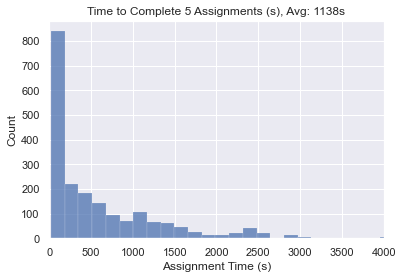

In [336]:
# Calcuating time per assignment for workers
sns.histplot(s_df['WorkTimeInSecon'])
plt.xlabel('Assignment Time (s)')
plt.xlim([0,4000])
plt.title('Time to Complete 5 Assignments (s), Avg: 1138s')
plt.savefig('../graphs/AssignmentTime.png', dpi=200)

In [337]:
# calculating bonuses for workers
bonus = s_df.loc[s_df['mask-type'] == 'original']
bonus['model-wrong'] = bonus['response'] != bonus['model-label']
bonus_stats = bonus.groupby(['Worker']).agg({'model-wrong': ['sum', 'count', 'mean']})
bonus_stats

<ipython-input-337-678a2764ce69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bonus['model-wrong'] = bonus['response'] != bonus['model-label']


model-wrong                
                       sum count      mean
Worker                                    
A1M52J1BIO1O2V           0     1  0.000000
A1PAY3X73PQ16S          25    73  0.342466
A1W7I6FN183I8F          21   119  0.176471
A2615YW1YERQBO          27   106  0.254717
A270HX8LH9LJ8W          16    86  0.186047
A2E0LU8V4EUX5C          12    58  0.206897

In [338]:
for id in bonus['Worker'].unique():
    df = bonus.loc[bonus['Worker'] == id]
    rate = round(bonus_stats.loc[id]['model-wrong']['mean'],2) # mean success rate on originals
    df['Turker-label'] = df['response']
    RTE_mat = pd.crosstab(index=df['model-label'], columns=[df['Turker-label']])
    RTE_mat

    sns.set(font_scale=1) # change font size
    ax = sns.heatmap(RTE_mat, annot=True, fmt = '0', square=1, cbar = False, linewidth=1., cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})

    plt.title(f'Worker {id} with {rate} on Original MNLI')
    plt.savefig(f'../graphs/{id}_Turker_orig_response.png', dpi = 200)
    
    plt.clf()

<ipython-input-338-542320079c0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Turker-label'] = df['response']
<ipython-input-338-542320079c0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Turker-label'] = df['response']
<ipython-input-338-542320079c0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

<Figure size 432x288 with 0 Axes>

In [339]:
# getting majority votes and calculating the number of originals workers get correct.

# slicing out the originals
origs = s_df.loc[s_df['mask-type'] == 'original']

agrees = []
orig_df = pd.DataFrame()

for hypo_id in origs['hypoID'].unique():
    ex = origs.loc[origs['hypoID'] == hypo_id] # 
    agrees.append(len(Counter(ex.response)))
    if len(Counter(ex.response)) < 3: # selecting agreements only
        agree = ex.copy().iloc[0]
        agree.response = ex['response'].value_counts().idxmax()
        agree['maj_count'] = len(ex['response'])
        agree['lab_count'] = len(Counter(ex.response))
        agree['keep'] = len(ex['response']) == 2 and len(Counter(ex.response)) == 1
        orig_df = orig_df.append(agree)

orig_df['model-wrong'] = orig_df['response'] != orig_df['model-label']
orig_wrongs = orig_df.loc[orig_df['model-wrong'] == True]
orig_wrongs.to_csv('../mturk/4-15-21/results/original_wrongs_5-3-21.csv')

In [340]:
orig_df['model-wrong'].sum()/len(orig_df['model-wrong'])

0.17006802721088435

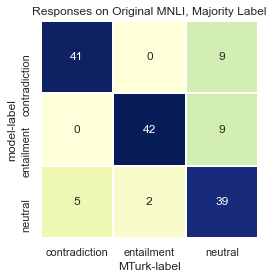

In [341]:
plt.clf()
df = orig_df
df['MTurk-label'] = df['response']
RTE_mat = pd.crosstab(index=df['model-label'], columns=[df['MTurk-label']])
RTE_mat

sns.set(font_scale=1) # change font size
ax = sns.heatmap(RTE_mat, annot=True, fmt = '0', square=1, cbar = False, linewidth=1., cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})

plt.title('Responses on Original MNLI, Majority Label')
plt.savefig('../graphs/MTurker_Original_responses.png', dpi = 200)

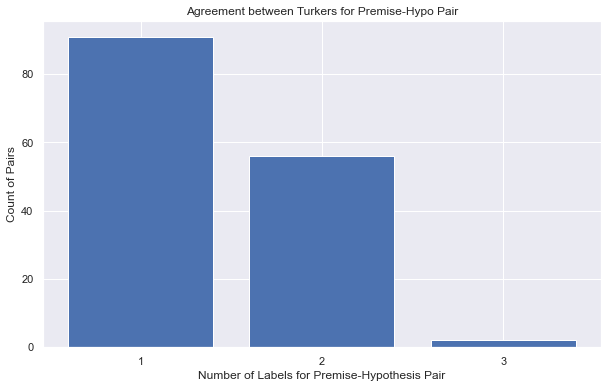

In [342]:
## Plotting Agreement between annotators
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams.update({'font.size': 15})
labels, counts = np.unique(agrees, return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Number of Labels for Premise-Hypothesis Pair')
plt.ylabel('Count of Pairs')
plt.title('Agreement between Turkers for Premise-Hypo Pair')
plt.savefig('../graphs/Turker_Agreement.png', dpi = 200)
plt.show()

In [343]:
# same as above but for entire dataset, getting generations that have majority labels
from collections import Counter

agrees = []
cum_df = pd.DataFrame()
sf_df = s_df.loc[s_df['mask-type'] != 'original']
for hypo_id in sf_df['hypoID'].unique():
    ex = sf_df.loc[sf_df['hypoID'] == hypo_id]
    agrees.append(len(Counter(ex.response)))
    if len(Counter(ex.response)) < 3:
        agree = ex.copy().iloc[0]
        agree.response = ex['response'].value_counts().idxmax()
        agree['maj_count'] = len(ex['response'])
        agree['lab_count'] = len(Counter(ex.response))
        agree['keep'] = len(ex['response']) == 2 and len(Counter(ex.response)) == 1
        cum_df = cum_df.append(agree)

print(Counter(cum_df['mask-type']))
cum_df

Counter({'content-words': 197, 'data-slices': 190, 'gradient': 189})


,WorkTimeInSecon,Worker,flip-class,hypoID,hypothesis,keep,lab_count,maj_count,mask-type,model-label,orig-prob,premID,premise,response
30,18388.0,A1PAY3X73PQ16S,Uncertain-Flip,48.0,Would the job pay more if it were not held by ...,0.0,2.0,3.0,data-slices,contradiction,0.99,131.0,If the job were held by someone other than Tri...,neutral
30,18388.0,A1PAY3X73PQ16S,Uncertain-Flip,51.0,Would the job pay less if it were done by Tripp?,0.0,2.0,3.0,data-slices,contradiction,0.99,131.0,If the job were held by someone other than Tri...,neutral
30,18388.0,A1PAY3X73PQ16S,Uncertain-Same,52.0,Would the job be better if it were not held by...,0.0,1.0,3.0,data-slices,entailment,0.99,131.0,If the job were held by someone other than Tri...,neutral
30,18388.0,A1PAY3X73PQ16S,Certain-Flip,53.0,Would the job pay less if it were only held by...,0.0,2.0,3.0,data-slices,contradiction,0.99,131.0,If the job were held by someone other than Tri...,neutral
64,823.0,A270HX8LH9LJ8W,Uncertain-Flip,2269.0,The Malla period saw advancements in either th...,0.0,1.0,3.0,content-words,neutral,1.00,427.0,The Malla period saw completion of Nepal's mos...,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,56.0,A2E0LU8V4EUX5C,Uncertain-Same,47116.0,The researchers knew the names of most of the ...,0.0,2.0,3.0,data-slices,contradiction,1.00,87090.0,The names of the companies are confidential an...,contradiction
226,162.0,A270HX8LH9LJ8W,Certain-Flip,47287.0,The civilization of the Roman Empire tried to ...,0.0,2.0,3.0,data-slices,contradiction,0.99,87394.0,"Tribal culture reigned, untouched by the more ...",neutral
226,162.0,A270HX8LH9LJ8W,Uncertain-Same,47288.0,The civilization of the Roman Empire was more ...,0.0,1.0,3.0,data-slices,entailment,0.99,87394.0,"Tribal culture reigned, untouched by the more ...",entailment
226,162.0,A270HX8LH9LJ8W,Uncertain-Flip,47290.0,The civilization of the Roman Empire did not c...,0.0,1.0,3.0,data-slices,neutral,0.99,87394.0,"Tribal culture reigned, untouched by the more ...",neutral


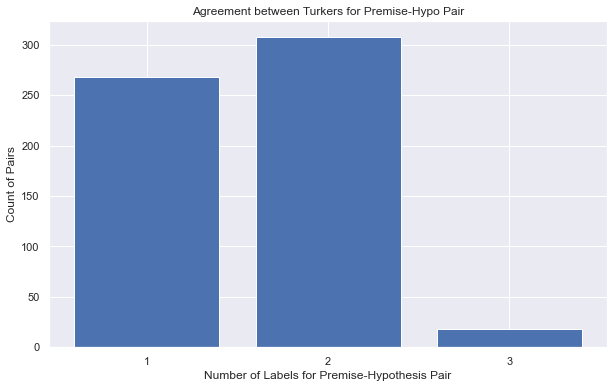

In [344]:
## Plotting Agreement between annotators
fig, ax = plt.subplots(figsize=(10,6))

plt.rcParams.update({'font.size': 15})
labels, counts = np.unique(agrees, return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Number of Labels for Premise-Hypothesis Pair')
plt.ylabel('Count of Pairs')
plt.title('Agreement between Turkers for Premise-Hypo Pair')
plt.savefig('../graphs/Turker_Agreement.png', dpi = 200)
plt.show()

# Analysis of Success of Flip Classes in Generating Model != Annotator Labels

In [345]:
orig_df_m = s_df.loc[s_df['mask-type'] == 'original'].drop_duplicates('premID')

In [346]:
# adding original hypotheses back into our generated pairs
df_out = pd.merge(cum_df, orig_df_m[['premID', 'hypothesis', 'model-label']], how='left', on ='premID')
assert df_out.shape[0] == cum_df.shape[0]
df_out['model-wrong'] = df_out['response'] != df_out['model-label_x']

# renaming columns
df_out = df_out[['flip-class', 'premID', 'premise', 'hypoID', 'hypothesis_x', 'hypothesis_y',
                'lab_count', 'maj_count', 'mask-type', 'model-label_x', 'response', 'model-wrong', 'model-label_y']]
df_out.columns = ['flip-class', 'premID', 'premise', 'hypoID', 'hypothesis', 'orig-hypothesis',
                'lab_count', 'maj_count', 'mask-type', 'model-label', 'response', 'model-wrong', 'orig-label']

print(df_out.shape)

df_out.to_csv('../mturk/4-15-21/results/mturk_clean_data_5-3-21.csv')

(576, 13)


In [347]:
cum_df = df_out
cum_df.loc[cum_df['model-wrong'] == True].to_csv('../mturk/4-15-21/results/mturk_wrongs_5-3-21.csv')

# generating model wrong statistics
cum_df.groupby(['mask-type', 'flip-class']).agg({'model-wrong': ['mean', 'count', 'sum']}).T

mask-type         content-words                                             \
flip-class         Certain-Flip Certain-Same Uncertain-Flip Uncertain-Same   
model-wrong mean            0.3     0.266667       0.478873       0.539474   
            count          20.0    30.000000      71.000000      76.000000   
            sum             6.0     8.000000      34.000000      41.000000   

mask-type          data-slices                                             \
flip-class        Certain-Flip Certain-Same Uncertain-Flip Uncertain-Same   
model-wrong mean      0.407407     0.238095           0.45       0.467742   
            count    27.000000    21.000000          80.00      62.000000   
            sum      11.000000     5.000000          36.00      29.000000   

mask-type             gradient                                             
flip-class        Certain-Flip Certain-Same Uncertain-Flip Uncertain-Same  
model-wrong mean           0.2     0.037037       0.457143       0.472222  
            count         20.0    27.000000      70.000000      72.000000  
            sum            4.0     1.000000      32.000000      34.000000

In [348]:
cum_df.shape

(576, 13)

## visualize direction of differences between model label and MTurker label

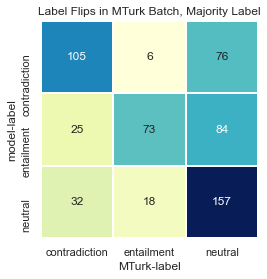

In [349]:
plt.clf()
df = cum_df
df['MTurk-label'] = df['response']
RTE_mat = pd.crosstab(index=df['model-label'], columns=[df['MTurk-label']])
RTE_mat

sns.set(font_scale=1) # change font size
ax = sns.heatmap(RTE_mat, annot=True, fmt = '0', square=1, cbar = False, linewidth=1., cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})

plt.title('Label Flips in MTurk Batch, Majority Label')

plt.savefig('../graphs/Label_Flips_MTurk_Maj.png', dpi = 200)

In [350]:
Counter(df['MTurk-label'])

Counter({'neutral': 317, 'entailment': 97, 'contradiction': 162})

In [351]:
Counter(df['model-label'])

Counter({'contradiction': 187, 'entailment': 182, 'neutral': 207})

In [352]:
Counter(df.loc[df['flip-class'] == 'Uncertain-Same']['MTurk-label'])

Counter({'neutral': 131, 'contradiction': 57, 'entailment': 22})

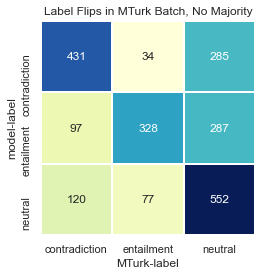

In [353]:
df = s_df

df['MTurk-label'] = df['response']
RTE_mat = pd.crosstab(index=df['model-label'], columns=[df['MTurk-label']])
RTE_mat

sns.set(font_scale=1) # change font size
ax = sns.heatmap(RTE_mat, annot=True, fmt = '0', square=1, cbar = False, linewidth=1., cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})

plt.title('Label Flips in MTurk Batch, No Majority')
plt.tight_layout()
plt.savefig('../graphs/Label_Flips_MTurk_All.png', dpi = 200)